## AIM: 
To predict sales for an item in a perticular store. So there will be data about the item and the store.

In [73]:
import pandas as pd
import numpy as np
import pandas_profiling as ppf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Model Creation
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from sklearn import preprocessing



from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error




In [2]:
sales_data = pd.read_csv("data/Train.csv")
to_predict = pd.read_csv("data/Test.csv")

sales_data contains the labelled data to build the model on it contain dependent variable(sales) and all the features
to_predict is the one on which we have to apply the data and make the predictions.

In [3]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Numerical Variables

In [5]:
sales_data.corrwith(sales_data.Item_Outlet_Sales)

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
dtype: float64

In [6]:
sales_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


F:\1_Softwares_Installed\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

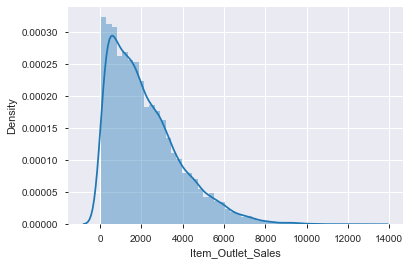

In [7]:
## Distributin of Item_Outlet_Sales
sns.distplot(sales_data.Item_Outlet_Sales)

F:\1_Softwares_Installed\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

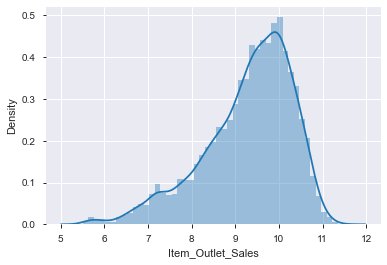

In [8]:
# Distribution is not noraml, checking log of it
sns.distplot(np.log(sales_data.Item_Outlet_Sales)+2)

### Categorical Variables

In [9]:
# These are the categorical variables we have
for col in ["Item_Fat_Content","Item_Type","Outlet_Establishment_Year","Outlet_Identifier","Outlet_Type","Outlet_Location_Type"]:
    print(col,": ",len(sales_data[col].unique()))

Item_Fat_Content :  5
Item_Type :  16
Outlet_Establishment_Year :  9
Outlet_Identifier :  10
Outlet_Type :  4
Outlet_Location_Type :  3


In [10]:
# There seems some problem with the category
sales_data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
# Looks fine But there are a lot of categories to take care
sales_data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [12]:
# We can make this a ordinal variable or we can turn it into the data st it show the oldness of the store
# Second problem is the data type is of real numbers
sales_data.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [13]:
sales_data.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [14]:
sales_data.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [15]:
sales_data.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

### Missing, Zeros, Correlation

### Issues Found
1. Column Item_Identifier seems to have very high cardinality with 1559 categories . It will be very difficult yo get thedummies for this much of categories and the problem of the space taken and the curse of dimensionality are also to be ignored. ----> We will drop this variable
2. Item Visiblity have high number of zeros. 6.2% of all the observations
3. Item Weight have very high number of missing values almost 17%
4. Outlet Size also have very high number of missing values 28.3%
5. Outlet establishment year is a categorical variable but is given data type of numeric(Real Number)
6. Outlet Identifier which is a categorical variable is highly correlated with other categorical variables Outlet_Location_type, Outlet_Size, Outlet_Size

### Corrections

In [16]:
# This is a categorical variables. But here  the coding is not okay we have to replace the values in this variable
sales_data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
sales_data.Item_Fat_Content = sales_data.Item_Fat_Content.replace({"low fat":"Low Fat",
                                    "LF":"Low Fat",
                                    "reg":"Regular"})

### Drop Variables

In [18]:
# Item_Identifier, Outlet_Identifier
# Item_Weight have high number of nan values
# Item types weren't giving that much significance

sales_data.drop(["Item_Identifier","Outlet_Size","Item_Weight","Item_Type"],axis=1,inplace= True)

### Dummy Variables

In [19]:
sales_data.columns

Index(['Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [20]:
sales_data = pd.get_dummies(sales_data,columns=["Item_Fat_Content","Outlet_Identifier","Outlet_Location_Type","Outlet_Type"],drop_first=True)

In [21]:
col = []
for column in sales_data.columns:
    col.append(column.replace(" ","_"))
    
sales_data.columns = col

In [22]:
sales_data.isna().sum()

Item_Visibility                  0
Item_MRP                         0
Outlet_Establishment_Year        0
Item_Outlet_Sales                0
Item_Fat_Content_Regular         0
Outlet_Identifier_OUT013         0
Outlet_Identifier_OUT017         0
Outlet_Identifier_OUT018         0
Outlet_Identifier_OUT019         0
Outlet_Identifier_OUT027         0
Outlet_Identifier_OUT035         0
Outlet_Identifier_OUT045         0
Outlet_Identifier_OUT046         0
Outlet_Identifier_OUT049         0
Outlet_Location_Type_Tier_2      0
Outlet_Location_Type_Tier_3      0
Outlet_Type_Supermarket_Type1    0
Outlet_Type_Supermarket_Type2    0
Outlet_Type_Supermarket_Type3    0
dtype: int64

### Multicollinerity:  Checking VIF(Variance Inflation Factor)

In [23]:
X =  sales_data[sales_data.columns.difference(["Item_Outlet_Sales","Outlet_Establishment_Year"])]

In [24]:
pd.concat([pd.Series([variance_inflation_factor(X.values,i) for i in range(len(X.columns))]),pd.Series(X.columns)],axis=1).sort_values(by=0)

F:\1_Softwares_Installed\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,0,1
1,1.000363,Item_MRP
0,1.002689,Item_Fat_Content_Regular
2,1.093086,Item_Visibility
6,1.632880,Outlet_Identifier_OUT019
13,9.855496,Outlet_Location_Type_Tier_3
14,inf,Outlet_Type_Supermarket_Type1
12,inf,Outlet_Location_Type_Tier_2
11,inf,Outlet_Identifier_OUT049
10,inf,Outlet_Identifier_OUT046
8,inf,Outlet_Identifier_OUT035


In [25]:
# Outlet_establishment_year  # VIF=32.78054 ----->> Remove it

In [26]:
## For making the dependent normal in distribution we applied some transformation

In [27]:
Y = np.log(sales_data.Item_Outlet_Sales)+1

In [28]:
data = pd.concat([X,Y],axis=1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Fat_Content_Regular       8523 non-null   uint8  
 1   Item_MRP                       8523 non-null   float64
 2   Item_Visibility                8523 non-null   float64
 3   Outlet_Identifier_OUT013       8523 non-null   uint8  
 4   Outlet_Identifier_OUT017       8523 non-null   uint8  
 5   Outlet_Identifier_OUT018       8523 non-null   uint8  
 6   Outlet_Identifier_OUT019       8523 non-null   uint8  
 7   Outlet_Identifier_OUT027       8523 non-null   uint8  
 8   Outlet_Identifier_OUT035       8523 non-null   uint8  
 9   Outlet_Identifier_OUT045       8523 non-null   uint8  
 10  Outlet_Identifier_OUT046       8523 non-null   uint8  
 11  Outlet_Identifier_OUT049       8523 non-null   uint8  
 12  Outlet_Location_Type_Tier_2    8523 non-null   u

# Outliert Treatment
def outlier_treat(x):
    x = x.clip(lower=x.quantile(0.01),upper = x.quantile(0.99))
    return x
X = X.apply(outlier_treat,axis=1)

Y = pd.DataFrame(Y).apply(outlier_treat)

In [30]:
# Converting data to standard scale, (z-Score)

In [31]:
### Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=123)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6818, 17) (6818,)
Test set: (1705, 17) (1705,)


## OLS Method

In [32]:
"+".join(data.columns)

'Item_Fat_Content_Regular+Item_MRP+Item_Visibility+Outlet_Identifier_OUT013+Outlet_Identifier_OUT017+Outlet_Identifier_OUT018+Outlet_Identifier_OUT019+Outlet_Identifier_OUT027+Outlet_Identifier_OUT035+Outlet_Identifier_OUT045+Outlet_Identifier_OUT046+Outlet_Identifier_OUT049+Outlet_Location_Type_Tier_2+Outlet_Location_Type_Tier_3+Outlet_Type_Supermarket_Type1+Outlet_Type_Supermarket_Type2+Outlet_Type_Supermarket_Type3+Item_Outlet_Sales'

### Without removing columns
modal = smf.ols("Item_Outlet_Sales~Item_Fat_Content_Regular+Item_MRP+Item_Type_Breads+Item_Type_Breakfast+Item_Type_Canned+Item_Type_Dairy+Item_Type_Frozen_Foods+Item_Type_Fruits_and_Vegetables+Item_Type_Hard_Drinks+Item_Type_Health_and_Hygiene+Item_Type_Household+Item_Type_Meat+Item_Type_Others+Item_Type_Seafood+Item_Type_Snack_Foods+Item_Type_Soft_Drinks+Item_Type_Starchy_Foods+Item_Visibility+Outlet_Location_Type_Tier_2+Outlet_Location_Type_Tier_3+Outlet_Type_Supermarket_Type1+Outlet_Type_Supermarket_Type2+Outlet_Type_Supermarket_Type3",data=data).fit()

In [33]:
modal = smf.ols("Item_Outlet_Sales~Item_Fat_Content_Regular+Item_MRP+Item_Visibility+Outlet_Identifier_OUT013+Outlet_Identifier_OUT017+Outlet_Identifier_OUT018+Outlet_Identifier_OUT019+Outlet_Identifier_OUT027+Outlet_Identifier_OUT035+Outlet_Identifier_OUT045+Outlet_Identifier_OUT046+Outlet_Identifier_OUT049+Outlet_Location_Type_Tier_2+Outlet_Location_Type_Tier_3+Outlet_Type_Supermarket_Type1+Outlet_Type_Supermarket_Type2+Outlet_Type_Supermarket_Type3",data=data).fit()

In [34]:
print(modal.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1829.
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:35:10   Log-Likelihood:                -6804.0
No. Observations:                8523   AIC:                         1.363e+04
Df Residuals:                    8510   BIC:                         1.373e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [35]:
y_hat = modal.predict(X_test)

In [36]:
print("Mean Absolute Percentage Error (Training Data) : ",np.mean(np.abs(modal.predict(X_train)-y_train)/y_train))
print("Mean Absolute Percentage Error (Test Data) :",np.mean(np.abs(y_hat-y_test)/y_test))

Mean Absolute Percentage Error (Training Data) :  0.05268335561298483
Mean Absolute Percentage Error (Test Data) : 0.05298668715084187


In [37]:
print("Root Mean Squared Error (Train Data) :", np.sqrt(np.mean((y_train-modal.predict(X_train))**2)))
print("Root Mean Squared Error (Test Data) :",np.sqrt(np.mean((y_test-y_hat)**2)))

Root Mean Squared Error (Train Data) : 0.5388228909291324
Root Mean Squared Error (Test Data) : 0.5327242585557084


## Linear Regression

In [38]:
simple_lr_model = LinearRegression()

In [39]:
simple_lr_model.fit(X_train,y_train)

LinearRegression()

In [40]:
y_hat = simple_lr_model.predict(X_test)

In [41]:
### The estimation of accuracy of model

In [42]:
print("Mean Absolute Percentage Error (Train Data) :", np.mean(np.abs(y_train-simple_lr_model.predict(X_train))/y_train))
print("Mean Absolute Percentage Error (Test Data) :",np.mean((np.abs(y_test-y_hat))/y_test))

Mean Absolute Percentage Error (Train Data) : 0.05264376822256627
Mean Absolute Percentage Error (Test Data) : 0.0530427190782039


In [43]:
### RMSE to compare models

In [44]:
print("Root Mean Squared Error (Train Data) :", np.sqrt(np.mean((y_train-simple_lr_model.predict(X_train))**2)))
print("Root Mean Squared Error (Test Data) :",np.sqrt(np.mean((y_test-y_hat)**2)))

Root Mean Squared Error (Train Data) : 0.538761090180855
Root Mean Squared Error (Test Data) : 0.5332847588069358


In [45]:
simple_lr_model.coef_

array([ 0.00591569,  0.00831978, -0.03546757,  0.61017103,  0.08206464,
        0.89062739, -0.34371411,  1.24563867,  0.10734175,  0.01208168,
        0.24420873,  0.27703327,  0.20148807, -0.37901596,  1.33290109,
        0.89062739,  1.24563867])

In [46]:
np.exp(y_hat-1)

array([ 840.72015383,  324.81072767, 2802.27946174, ...,  346.41667917,
       4564.87062507, 1991.495448  ])

In [48]:
pred = np.exp(y_hat-1)

In [49]:
pred

array([ 840.72015383,  324.81072767, 2802.27946174, ...,  346.41667917,
       4564.87062507, 1991.495448  ])

In [62]:
actual = np.exp(y_test-1)
actual = actual.reset_index()

In [70]:
decile = pd.concat([pd.Series(pred),actual.Item_Outlet_Sales],axis=1)
decile.columns = ["pred","actual"]
decile.sort_values(by="pred",ascending=False,inplace=True)
decile.head()

,pred,actual
1477,8515.287123,6872.3876
1196,8288.499914,5697.9164
81,8236.415566,8028.8822
976,8103.839923,7433.6570
890,8044.862882,4346.3424


In [71]:
decile["decile"] = pd.qcut(decile.pred,10,labels=False) 

In [72]:
decile.groupby("decile").mean()

,pred,actual
decile,,
0,210.207004,257.232414
1,655.586261,600.806171
2,964.741519,1005.315171
3,1269.200954,1551.678232
4,1496.742991,1795.140862
5,1851.567162,2321.010132
6,2213.712693,2597.704862
7,2605.503484,3114.211363
8,3409.878394,3672.059325


In [75]:
rf = ExtraTreesRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE : ", mse)

MSE :  0.3496428005966545
